# Statistical Modeling

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as am
import statsmodels.formula.api as smf

/Users/fabian/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
gapminder = pd.read_csv('05_04/gapminder.csv')

In [7]:
gdata = gapminder.query('year == 1985')

### Cross Validation

Dataset


<i>(This dataset is split into a training set and a testing set)</i>

[Training data(0),(1)] [Testing data(2)]


[(0)In-sample prediction error][(1)Fitted Model][(2)Out-of-sample prediction error]


This is an attempt of visual representation of cross validation. Where we have two data sets one which is in sample and the other which is out  sample we test for a fit model. The example below will cover this more in depth.

In [8]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving', 'babies_per_woman', c=colors, s=size, linewidths=0.5, edgecolor='k', alpha=0.5)

def plotfit(fit, data=gdata):
    plotdata(data)
    
    size, colors = sc(data)
    pp.scatter(data.age5_surviving, fit.predict(data), c=colors, s=30, linewidths=0.5, edgecolor='k', marker='D')

In [9]:
f_groupmeans = 'babies_per_woman ~ -1 + region'
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'
f_srp = ('babies_per_woman ~ -1 + region + age5_surviving + age5_surviving:region - age5_surviving + population')


In [10]:
shuffled = gdata.sample(len(gdata)) # This simply shuffles our dataset

In [11]:
training, testing = shuffled.iloc[:len(gdata)//2], shuffled.iloc[len(gdata)//2:]

In [12]:
# //2 is interger division to make sure we are working with a correct
# index

We have ***traning*** set which we use to feed the model and a ***testing*** set which has the process of evaulting the models prediction error. So instead of viewing ***in sample prediction error*** we will  look out for ***out of sample prediction error***.

In [13]:
surviving = smf.ols(f_surviving, data=training).fit()

# We now fit a model to training data, using one of our formulas

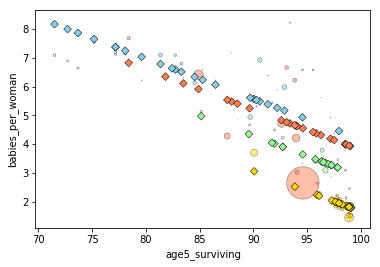

In [14]:
plotfit(surviving, training) # The result

In [15]:
surviving.mse_resid

0.87664327593335611

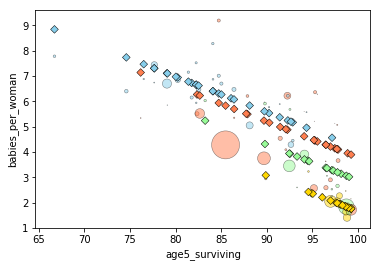

In [16]:
plotfit(surviving, testing)

In [17]:
resid = surviving.predict(testing) - testing.babies_per_woman
df = len(testing) - surviving.df_model -1
np.sum(resid**2) /df

1.072443546607703

In [18]:
def cross_validate(data, formula, response, n=100):
    ret = []
    # return to python list
    for i in range(n):
        shuffled = data.sample(len(data))
        # Shuffle
        training, testing = shuffled.iloc[:len(data)//2], shuffled.iloc[len(data)//2:]
        # Divide in two
        trained = smf.ols(formula, data=training).fit()
        # Train
        resid = trained.predict(testing) - testing[response]
        df = len(testing) - trained.df_model - 1
        mse = np.sum(resid**2) / df
        # Compute the mean ^^2 error
        ret.append(mse)
        
    return np.mean(ret)

In [19]:
cross_validate(gdata, f_groupmeans, 'babies_per_woman')

1.6297563287109593

In [20]:
cross_validate(gdata, f_surviving, 'babies_per_woman')

1.0340797335779675

In [21]:
cross_validate(gdata, f_srp, 'babies_per_woman')

1.1764629189162656

Cross validation confirms the verdict of analytical goodness of fit measures. The model of intermediate complexity seems to hit the sweet spot in terms of explanatory power. 

In theory of all data analysts use k fold cross validation instead of dividing the data in two we divide it in k subsets, and then in k successive trials we hold out one of the subsets for testing and trains on all the rest. Finally, the k resulting models are averaged. K fall cross validation is supported in the Python package scikit-learn.